### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Logistic Regression Class for classification

In [2]:
class Logistic_Reg():
    def __init__(self,lr=0.01,n_iters=15):
        self.lr=lr
        self.n_iters=n_iters
        self.weights=None
        self.bias=None

    def fit(self, X, y):
        #print(f'X = {X.shape}')
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #print(f'X = {X.shape}, w = {self.weights.shape}')
        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)
            
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        return self.weights,self.bias

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    
    # This will make prediction when we provide it Weights and bias explicitly
    def predict2(self,X,W,b):
        linear_model = np.dot(X, W) + b
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
        

    def _sigmoid(self, x):
        sig=1 / (1 + np.exp(-x))
        return sig
        

## Performing Exploratory data analysis(EDA) and Pre Processing

In [3]:
df=pd.read_csv('sales_team.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
 df['Gender'].replace(['Male','Female'],[1,0],inplace=True) # changing column 'Gender' values from alphabets to numerics.

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [7]:
df['Purchased'].value_counts() # number of instances of 0 and 1 class respectively

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
df.drop('User ID',axis=1,inplace=True) # The column 'User ID' is not important for prediction so dropping it from the tabel.

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


### Visualizing the important columns

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

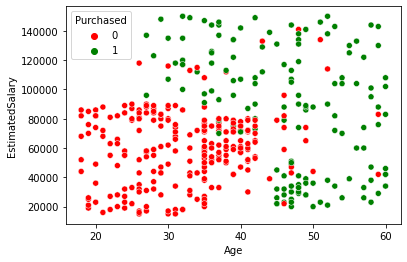

In [10]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=df,palette=['red','green'])

In [11]:
X=df.drop('Purchased',axis=1) # dropping 'Purchased' column because it is the label column which we have to predict

In [12]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [13]:
y=df['Purchased']

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [15]:
# Changing the X and y dataframes to numpy arrays for machine learning input!
X=X.to_numpy(dtype='float64')
y=y.to_numpy(dtype='float64')

## Splitting data into training and testing datasets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

## Scaling the data to make it easy for a model to learn and understand the problem.

In [17]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

In [18]:
X_train[:10]

array([[-0.96720415, -1.03893527, -1.12434375],
       [-0.96720415, -0.25900263, -0.73854922],
       [-0.96720415,  0.03347211,  0.32980486],
       [-0.96720415, -0.25900263, -0.11534267],
       [-0.96720415, -0.25900263, -0.26372518],
       [ 1.03390789, -1.72137633,  0.50786387],
       [ 1.03390789,  0.91089633,  1.07171742],
       [ 1.03390789, -0.74646053, -1.53981478],
       [-0.96720415, -0.45398579, -0.82757872],
       [ 1.03390789,  0.22845527, -0.35275469]])

## Applying Logistic Regression on our training data

In [19]:
LR=Logistic_Reg(lr=1.3,n_iters=300)

In [20]:
# Finding the best value of W and b respectively
W,b=LR.fit(X_train,y_train)
(W,b)

(array([0.12167551, 2.49304987, 1.3418304 ]), -1.1302404751808313)

In [21]:
y_pred = LR.predict(X_train)

## Evaluation Metrics for our model

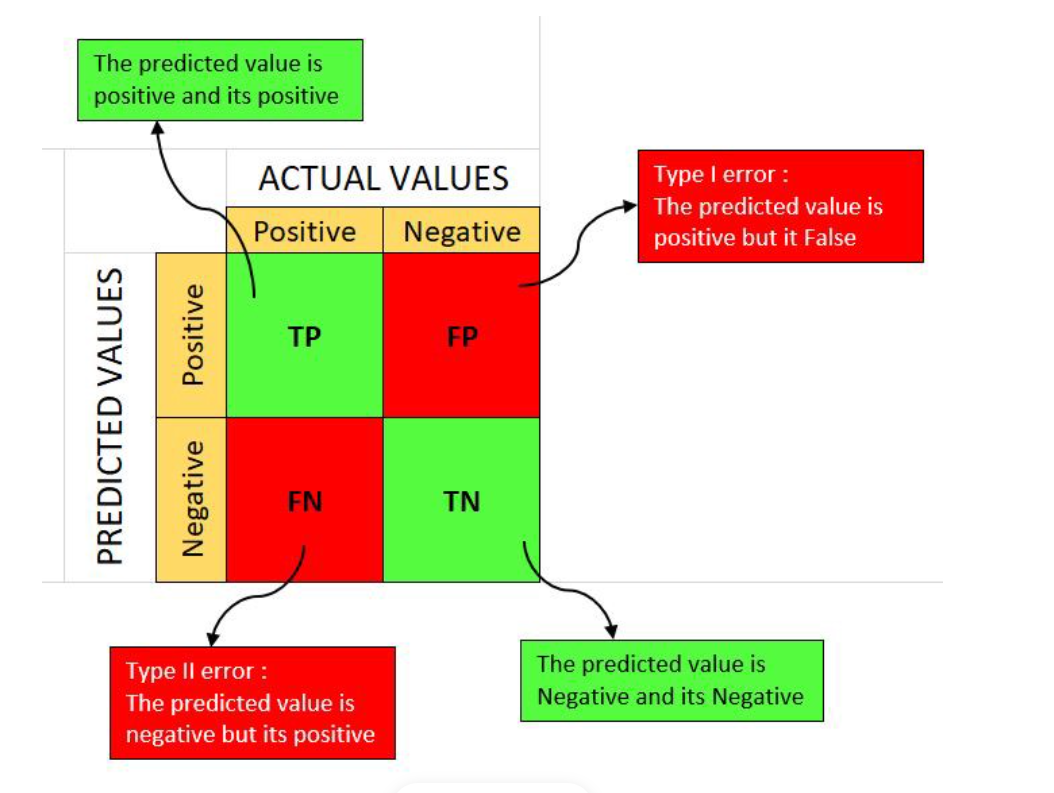

In [22]:
print(f'len of y = {len(y_train)}')
print('confusion matrix = ',confusion_matrix(y_train,y_pred)) # 236,21,45,98

len of y = 300
confusion matrix =  [[178  14]
 [ 27  81]]


In [23]:
print ("Accuracy : ", accuracy_score(y_train, y_pred)) 

Accuracy :  0.8633333333333333


## Our model is ready now. Lets predict on our testing data now

In [24]:
LR2=Logistic_Reg()

In [25]:
y_test_pred = LR2.predict2(X_test,W,b)

## Confusion Matrix on test set

In [26]:
print(f'len of y = {len(y_test)}')
print('confusion matrix = ',confusion_matrix(y_test,y_test_pred)) # 236,21,45,98

len of y = 100
confusion matrix =  [[57  8]
 [10 25]]


## Accuracy on test set

In [27]:
print ("Accuracy : ", accuracy_score(y_test, y_test_pred)) 

Accuracy :  0.82
